In [1]:
import torch
import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph
import torch.nn as nn                     # neural networks
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker
from torch.nn.parameter import Parameter

import numpy as np
import time
from pyDOE import lhs         #Latin Hypercube Sampling
import scipy.io

from smt.sampling_methods import LHS
from scipy.io import savemat

#Set default dtype to float32
torch.set_default_dtype(torch.float)

#PyTorch random number generator
torch.manual_seed(1234)

# Random number generators in other libraries
np.random.seed(1234)

device = torch.device('cpu')

print(device)

if device == 'cuda': 
    print(torch.cuda.get_device_name())

cpu


In [2]:
# Domain bounds
def plot_1D(prob_name,num_steps,ax_loss,ax_beta,i):
    if (i==0):
        data_stan = scipy.io.loadmat(prob_name + 'stan.mat')
        data_tanh = scipy.io.loadmat(prob_name + 'tanh.mat')
        data_atanh = scipy.io.loadmat(prob_name + 'atanh.mat')
        data_swish = scipy.io.loadmat(prob_name + 'swish.mat')
        data_rowdy = scipy.io.loadmat(prob_name + 'rowdy.mat')
    
    if (i==1):
        data_stan = scipy.io.loadmat(prob_name + 'stan/1D_FODE_stan.mat')
        data_tanh = scipy.io.loadmat(prob_name + 'tanh/1D_FODE_tanh.mat')
        data_atanh = scipy.io.loadmat(prob_name + 'atanh/1D_FODE_atanh.mat')
        data_swish = scipy.io.loadmat(prob_name + 'swish/1D_FODE_swish.mat')
        data_rowdy = scipy.io.loadmat(prob_name + 'rowdy/1D_FODE_rowdy.mat')
    
    if (i==2):
        data_stan = scipy.io.loadmat(prob_name + 'stan/1D_SODE_stan.mat')
        data_tanh = scipy.io.loadmat(prob_name + 'tanh/1D_SODE_tanh.mat')
        data_atanh = scipy.io.loadmat(prob_name + 'atanh/1D_SODE_atanh.mat')
        data_swish = scipy.io.loadmat(prob_name + 'swish/1D_SODE_swish.mat')
        data_rowdy = scipy.io.loadmat(prob_name + 'rowdy/1D_SODE_rowdy.mat')


    train_loss_stan =  data_stan['train_loss']
    train_loss_tanh =  data_tanh['train_loss']
    train_loss_atanh =  data_atanh['train_loss']
    train_loss_swish =  data_swish['train_loss']
    train_loss_rowdy =  data_rowdy['train_loss']

    mean_train_loss_stan = np.zeros((num_steps,1))
    mean_train_loss_tanh = np.zeros((num_steps,1))
    mean_train_loss_atanh = np.zeros((num_steps,1))
    mean_train_loss_swish = np.zeros((num_steps,1))
    mean_train_loss_rowdy = np.zeros((num_steps,1))

    for i in range(10):
        mean_train_loss_stan= mean_train_loss_stan + train_loss_stan[i][:num_steps].reshape(-1,1)
        mean_train_loss_tanh = mean_train_loss_tanh + train_loss_tanh[i][:num_steps].reshape(-1,1)
        mean_train_loss_atanh = mean_train_loss_atanh + train_loss_atanh[i][:num_steps].reshape(-1,1)
        mean_train_loss_swish = mean_train_loss_swish + train_loss_swish[i][:num_steps].reshape(-1,1)
        mean_train_loss_rowdy = mean_train_loss_rowdy + train_loss_rowdy[i][:num_steps].reshape(-1,1)



    mean_train_loss_stan = mean_train_loss_stan/10
    mean_train_loss_tanh = mean_train_loss_tanh/10
    mean_train_loss_atanh = mean_train_loss_atanh/10
    mean_train_loss_swish = mean_train_loss_swish/10
    mean_train_loss_rowdy = mean_train_loss_rowdy/10

    


    ax_loss.plot(mean_train_loss_stan,'r',linewidth = 2,label = 'Proposed')
    ax_loss.plot(mean_train_loss_tanh,'k',linewidth = 2, label = 'tanh',linestyle = (0, (3, 1, 1, 1)))
    ax_loss.plot(mean_train_loss_atanh,'b--',linewidth = 2, label = 'N-LAAF')
    ax_loss.plot(mean_train_loss_swish,'g:',linewidth = 2, label = 'Swish')
    ax_loss.plot(mean_train_loss_rowdy,'c-.',linewidth = 2, label = 'Rowdy')
    
    ax_loss.set_xlim([0,num_steps])
#     if(i<2):
#         ax_loss.set_aspect(aspect = 1/4)
#     else:
#         ax_loss.set_aspect(aspect = 10)
    
    
    
    

    #ax.set_fontvariant('normal')

    #ax_loss.set_yscale('log')
    ax_loss.legend(prop={'size':6})
    #x.set_ylim([1e-5,20])
#    ax_loss.set_title('Training Loss', fontsize=14)
    ax_loss.set_xlabel('Epochs',fontsize=14,alpha = 1)
    ax_loss.set_ylabel('Loss',fontsize=14, math_fontfamily='cm')
    ax_loss.tick_params(axis='x', labelsize=8)
    ax_loss.tick_params(axis='y', labelsize=8)

    beta_stan =  data_stan['beta']

    beta_history = beta_stan[0,:num_steps,35,2] #For the first repetition

    ax_beta.plot(beta_history,'r')
    
    ax_beta.set_xlim([0,num_steps])
    

    
#     ax_beta.set_title('Value', fontsize=14, math_fontfamily='cm')
    ax_beta.set_xlabel('Epochs', fontsize=14, math_fontfamily='cm')
    ax_beta.set_ylabel('$\\beta$',fontsize=14, math_fontfamily='cm')
    ax_beta.tick_params(axis='x', labelsize=8)
    ax_beta.tick_params(axis='y', labelsize=8)
#    ax_beta.set_aspect(aspect = 5000/0.4)
#plt.savefig(prob_name + 'beta_history.eps', format='eps',pad_inches=0, bbox_inches='tight')

#fig.savefig('Regr_smooth_train_loss.pdf', format='pdf',pad_inches=0, bbox_inches='tight')
    return ax_loss,ax_beta


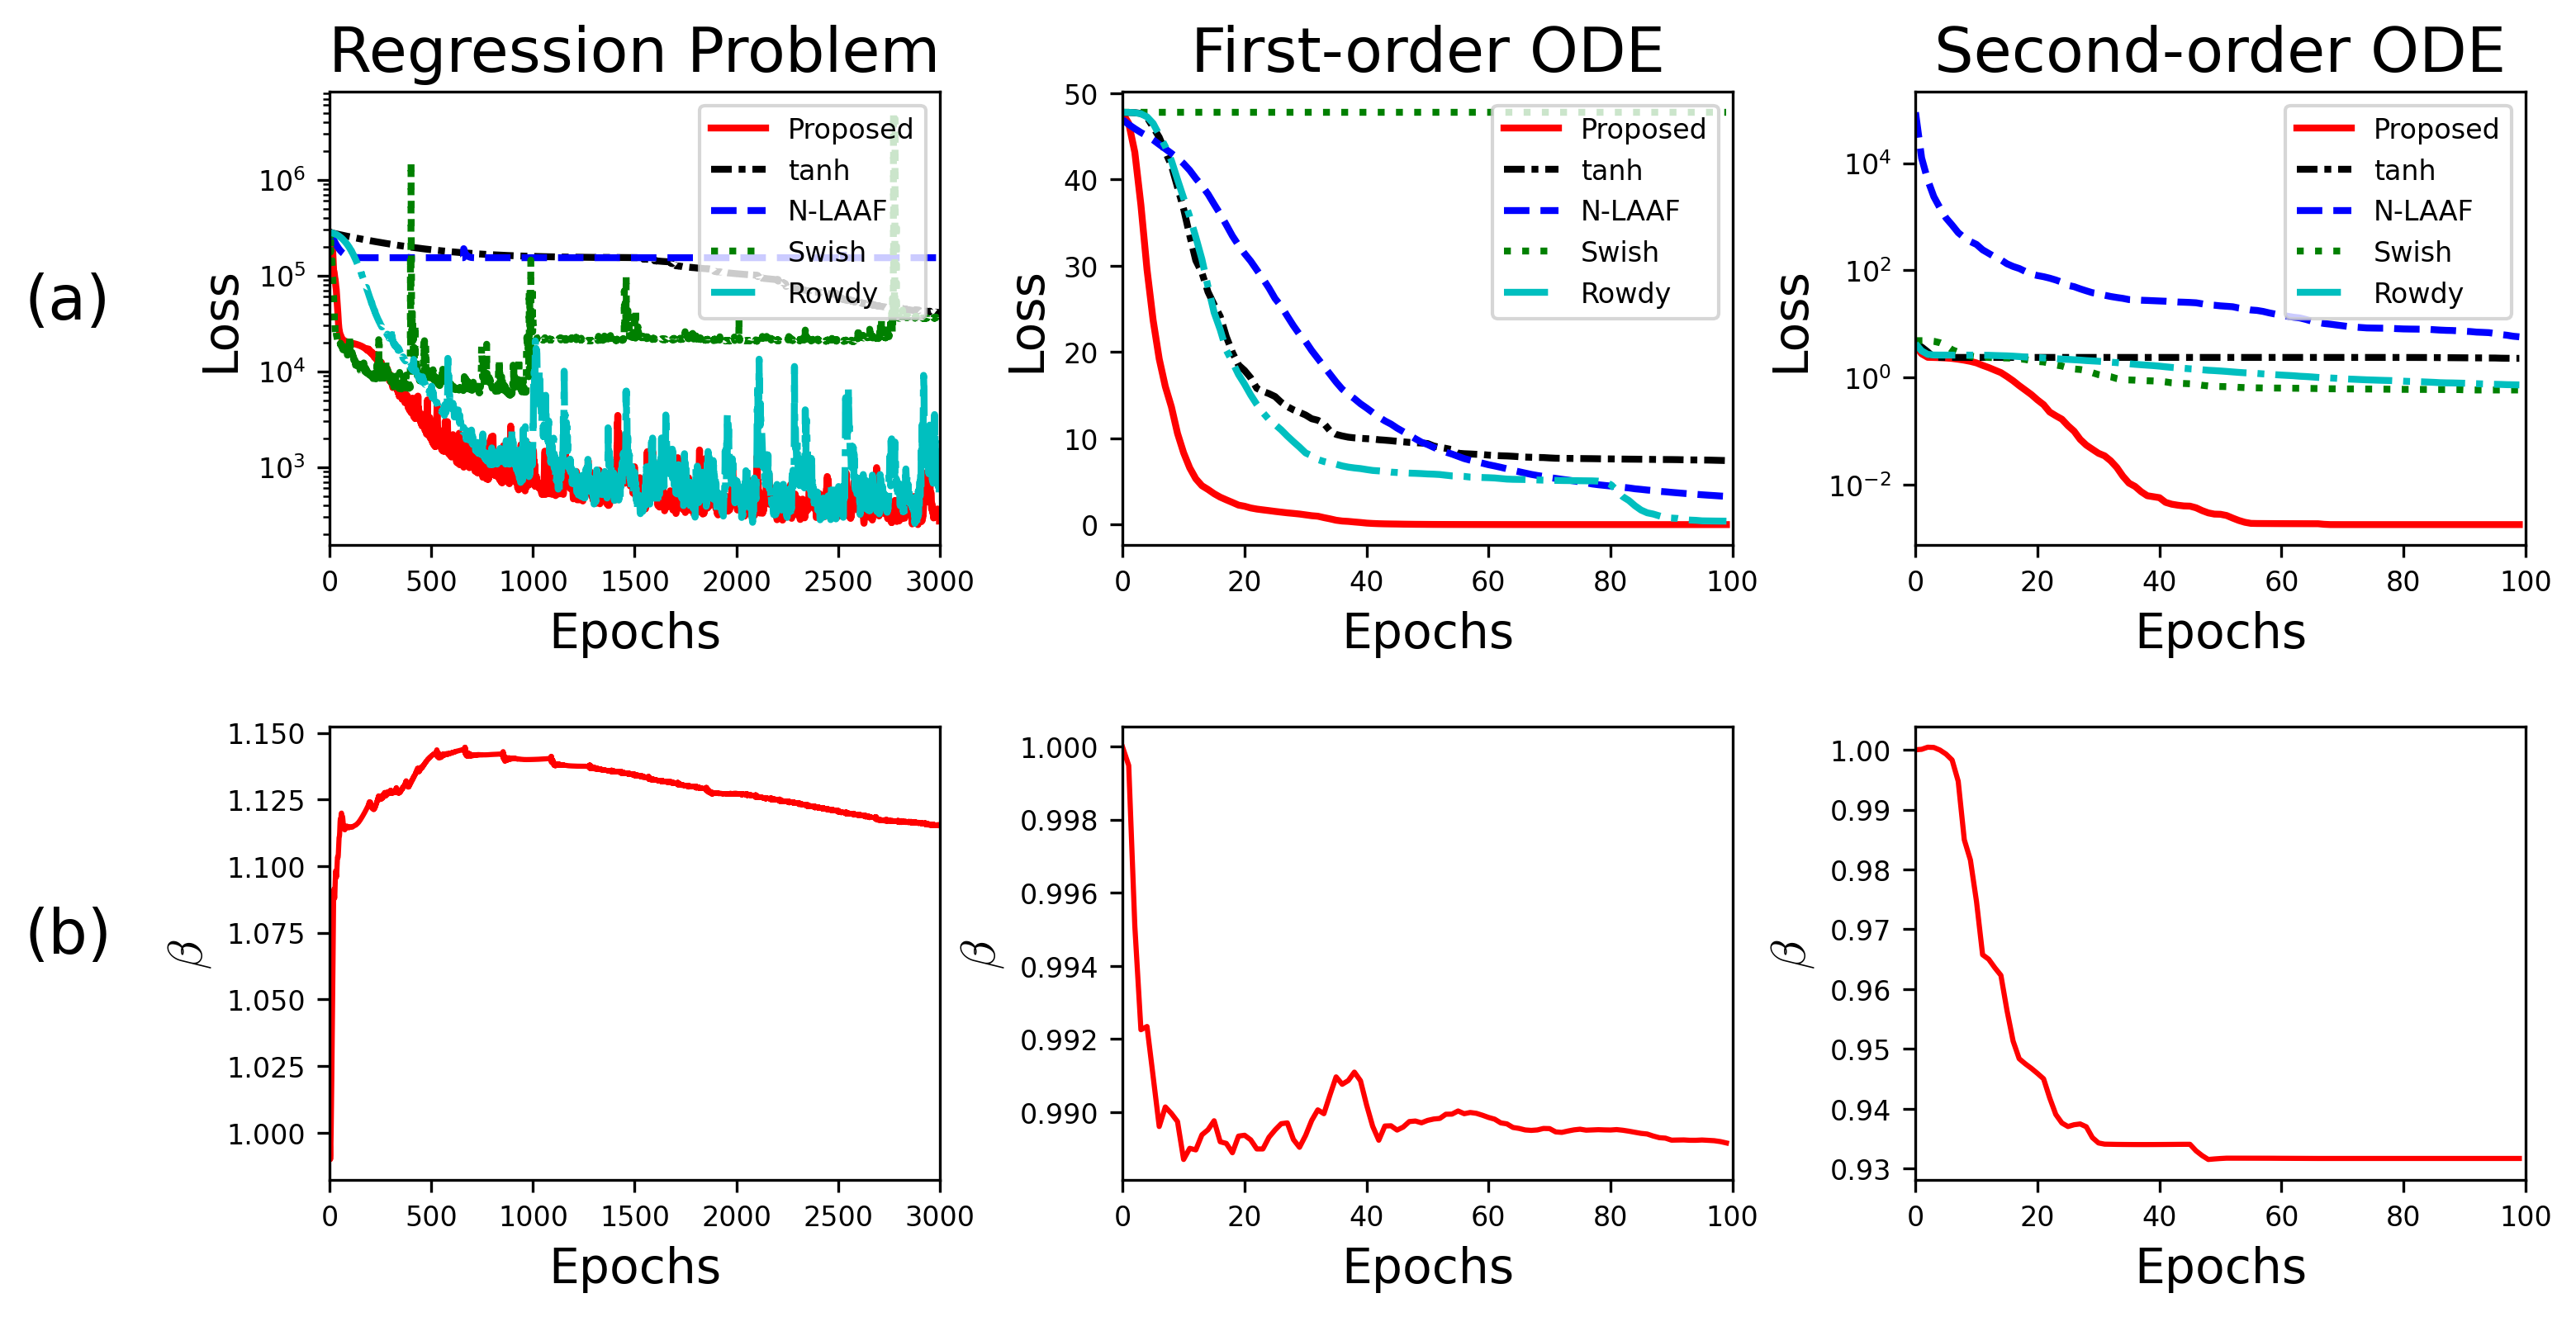

In [3]:
fig, ax = plt.subplots(2,3)
fig.dpi=300
fig.tight_layout()

# ax[0,0].set_aspect(aspect = 1/80)
# ax[0,0].axis('off')
# ax[0,0].text(0,0.5,"Training Loss",fontsize=18)

# ax[1,0].set_aspect(aspect = 1/80)
# ax[1,0].axis('off')
# ax[1,0].text(0,0.5,"$\\beta$ Convergence",fontsize=18)

prob_names = ['./Regression/Discontinuous1/Regr_disc_','./1D/FODE/','./1D/SODE/']

num_steps = [3000,100,100]

ax[0,0].set_yscale('log')
ax[0,2].set_yscale('log')

for i in range(3):
    
    ax[0,i].figure.set_size_inches(10,5)
    ax[1,i].figure.set_size_inches(10,5)
    

    ax[0,i],ax[1,i]= plot_1D(prob_names[i],num_steps[i],ax[0,i],ax[1,i],i)
    ax[0,i].legend(prop={'size':8}, loc = 'upper right')
    
#ax[0,0].set_title('Smooth Function',fontsize=18, math_fontfamily='cm')
ax[0,0].set_title('Regression Problem',fontsize=18, math_fontfamily='cm')
ax[0,1].set_title('First-order ODE',fontsize=18, math_fontfamily='cm')
ax[0,2].set_title('Second-order ODE',fontsize=18, math_fontfamily='cm')

plot_rows = ['(a)','(b)']

for i in range(2):
    ax[i,0].text(-0.5,0.5,plot_rows[i],fontsize=18,transform=ax[i,0].transAxes)


fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace =0.3, hspace=0.4)
plt.savefig('1D_Loss_Beta.pdf', format='pdf',pad_inches=0, bbox_inches='tight')
    

In [9]:


num_steps = [3000,100,100]

prob_names= ['Regr_disc','1D_FODE_','1D_SODE_']

activs = ["stan","tanh","atanh","swish","rowdy"]
linetypes = ['r','k','b--','g:','c-.']
labels = ['Stan (Proposed)','tanh','N-LAAF','Swish','Rowdy']

prob_folders = ['./Regression/Discontinuous1/Regr_disc_','./1D/FODE/','./1D/SODE/']

for s in range(3):

    for t in range(5):
        if (s==0):
            data = scipy.io.loadmat(prob_folders[s] + activs[t] + '.mat')
            
            test_loss =  data['test_mse']

            mean_test_loss = np.zeros((num_steps[s],1))

            for i in range(10):
                mean_test_loss = mean_test_loss + test_loss[i,:num_steps[s]].reshape(-1,1)

            mean_test_loss = mean_test_loss/10

            print(prob_names[s]," ",labels[t]," MSE: ",mean_test_loss[-1])

            test_loss =  data['test_re']

            mean_test_loss = np.zeros((num_steps[s],1))

            for i in range(10):
                mean_test_loss = mean_test_loss + test_loss[i,:num_steps[s]].reshape(-1,1)

            mean_test_loss = mean_test_loss/10

            print(prob_names[s]," ",labels[t]," RE: ",mean_test_loss[-1])
        
        else:
            data = scipy.io.loadmat(prob_folders[s] + activs[t] + '/' + prob_names[s] + activs[t] + '.mat')
        
            
            test_loss =  data['test_mse_loss']

            mean_test_loss = np.zeros((num_steps[s],1))

            for i in range(10):
                mean_test_loss = mean_test_loss + test_loss[i,:num_steps[s]].reshape(-1,1)

            mean_test_loss = mean_test_loss/10

            print(prob_names[s]," ",labels[t]," MSE: ",mean_test_loss[-1])

            test_loss =  data['test_re_loss']

            mean_test_loss = np.zeros((num_steps[s],1))

            for i in range(10):
                mean_test_loss = mean_test_loss + test_loss[i,:num_steps[s]].reshape(-1,1)

            mean_test_loss = mean_test_loss/10

            print(prob_names[s]," ",labels[t]," RE: ",mean_test_loss[-1])
            
        


Regr_disc   Stan (Proposed)  MSE:  [684.33969205]
Regr_disc   Stan (Proposed)  RE:  [0.04850862]
Regr_disc   tanh  MSE:  [40667.41796581]
Regr_disc   tanh  RE:  [0.36309433]
Regr_disc   N-LAAF  MSE:  [151987.59085646]
Regr_disc   N-LAAF  RE:  [0.74564394]
Regr_disc   Swish  MSE:  [36732.25517394]
Regr_disc   Swish  RE:  [0.27530505]
Regr_disc   Rowdy  MSE:  [859.64232879]
Regr_disc   Rowdy  RE:  [0.05428489]
1D_FODE_   Stan (Proposed)  MSE:  [0.03332913]
1D_FODE_   Stan (Proposed)  RE:  [0.00202441]
1D_FODE_   tanh  MSE:  [1344.07580341]
1D_FODE_   tanh  RE:  [0.45482597]
1D_FODE_   N-LAAF  MSE:  [289.48200437]
1D_FODE_   N-LAAF  RE:  [0.22270447]
1D_FODE_   Swish  MSE:  [5222.68224591]
1D_FODE_   Swish  RE:  [0.99999992]
1D_FODE_   Rowdy  MSE:  [44.62664143]
1D_FODE_   Rowdy  RE:  [0.05249021]
1D_SODE_   Stan (Proposed)  MSE:  [0.00330103]
1D_SODE_   Stan (Proposed)  RE:  [0.00195499]
1D_SODE_   tanh  MSE:  [367.56810735]
1D_SODE_   tanh  RE:  [0.97466506]
1D_SODE_   N-LAAF  MSE:  [37